In [5]:
import pandas as pd
import numpy as np

In [11]:
experiments = 5
epochs = 40

activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'ThresholdedReLU']
# activations = ['elu']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
# optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
#             'data' : [pd.read_csv('./logs/done/mnist_cnn_' + act +'_' + opt + '_' + str(epochs) + '_' + str(ex)  + '_fd_64.csv', sep=';') for ex in range(experiments)],
            'data' : [pd.read_csv('./logs/mnist_cnn_' + act +'_' + opt + '_' + str(epochs) + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0
            }
        })
        i+=1

max_epoch = 0
        

In [12]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [13]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
291,hard_sigmoid_sgd,1.0,0.924600,0.263324,0.9290,0.246834,sgd,hard_sigmoid
288,hard_sigmoid_adam,3.0,0.897067,0.329911,0.9297,0.231199,adam,hard_sigmoid
293,hard_sigmoid_sgd,3.0,0.927450,0.251721,0.9347,0.231730,sgd,hard_sigmoid
294,hard_sigmoid_sgd,4.0,0.927317,0.250962,0.9356,0.234006,sgd,hard_sigmoid
13,sigmoid_sgd,3.0,0.935567,0.223351,0.9417,0.209160,sgd,sigmoid
12,sigmoid_sgd,2.0,0.935100,0.223753,0.9434,0.202040,sgd,sigmoid
11,sigmoid_sgd,1.0,0.932600,0.228403,0.9435,0.203249,sgd,sigmoid
14,sigmoid_sgd,4.0,0.937683,0.216495,0.9442,0.195965,sgd,sigmoid
292,hard_sigmoid_sgd,2.0,0.939017,0.210721,0.9459,0.192976,sgd,hard_sigmoid
10,sigmoid_sgd,0.0,0.937900,0.213385,0.9460,0.188718,sgd,sigmoid


In [14]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
291,hard_sigmoid_sgd,1.0,0.924600,0.263324,0.9290,0.246834,sgd,hard_sigmoid
288,hard_sigmoid_adam,3.0,0.897067,0.329911,0.9297,0.231199,adam,hard_sigmoid
293,hard_sigmoid_sgd,3.0,0.927450,0.251721,0.9347,0.231730,sgd,hard_sigmoid
294,hard_sigmoid_sgd,4.0,0.927317,0.250962,0.9356,0.234006,sgd,hard_sigmoid
13,sigmoid_sgd,3.0,0.935567,0.223351,0.9417,0.209160,sgd,sigmoid
12,sigmoid_sgd,2.0,0.935100,0.223753,0.9434,0.202040,sgd,sigmoid
11,sigmoid_sgd,1.0,0.932600,0.228403,0.9435,0.203249,sgd,sigmoid
14,sigmoid_sgd,4.0,0.937683,0.216495,0.9442,0.195965,sgd,sigmoid
292,hard_sigmoid_sgd,2.0,0.939017,0.210721,0.9459,0.192976,sgd,hard_sigmoid
10,sigmoid_sgd,0.0,0.937900,0.213385,0.9460,0.188718,sgd,sigmoid


In [15]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100
    val_acc_diff = 0.
    
    min_val_acc_diff_10 = 1.
    min_val_acc_diff_epoch = 0
    
    has_hit = False

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        val_acc_diffs = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
            if epoch > 0:
                val_acc_diffs.append(data[d]['data'][experiment].iloc[epoch]['val_acc'] - data[d]['data'][experiment].iloc[epoch-1]['val_acc'])
            else:
                val_acc_diffs.append(0)
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        av_val_acc_diffs = sum(val_acc_diffs)/len(val_acc_diffs)
        std = np.std(val_acc)

        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch
        
#         if(av_val_acc > max_val_acc):
#             max_val_acc = av_val_acc
#             data[d]['best']['max_val_acc'] = max_acc
#             data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch
        
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss),
            'val_acc_diff' : av_val_acc_diffs,
            'val_acc_std': std}, ignore_index=True)
        
        if epoch>5:
            av_val_acc_diff_10 = np.mean(np.absolute(data[d]['averaged'].iloc[epoch-6:epoch]['val_acc_diff'].values))
            
            if av_val_acc_diff_10 < 0.00005 and av_val_acc > max_val_acc:
                max_val_acc = av_val_acc
                data[d]['best']['max_val_acc'] = max_acc
                data[d]['best']['max_val_acc_epoch'] = epoch
                has_hit = True
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10) + ' HIT!')
#             else:
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10))
    if not has_hit:
        data[d]['best']['max_val_acc'] = data[d]['averaged'].iloc[epochs-1]['val_acc']
        data[d]['best']['max_val_acc_epoch'] = epochs
        print('Config: ' + data[d]['disp_name'] + ' had no hits, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))
    else:
        print('Config: ' + data[d]['disp_name'] + ' HAD HITS, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))

Config: sigmoid_rmsp had no hits, max val_acc: 0.98626 at epoch 40
Config: sigmoid_adam HAD HITS, max val_acc: 0.995286666667 at epoch 39
Config: sigmoid_sgd had no hits, max val_acc: 0.94376 at epoch 40
Config: sigmoid_Adagrad had no hits, max val_acc: 0.96512 at epoch 40
Config: sigmoid_Adadelta had no hits, max val_acc: 0.98594 at epoch 40
Config: sigmoid_Adamax had no hits, max val_acc: 0.98704 at epoch 40
Config: sigmoid_Nadam HAD HITS, max val_acc: 0.995983333333 at epoch 37
Config: tanh_rmsp HAD HITS, max val_acc: 0.999106666667 at epoch 33
Config: tanh_adam HAD HITS, max val_acc: 0.999113333333 at epoch 35
Config: tanh_sgd had no hits, max val_acc: 0.98436 at epoch 40
Config: tanh_Adagrad HAD HITS, max val_acc: 0.99512 at epoch 37
Config: tanh_Adadelta had no hits, max val_acc: 0.9867 at epoch 40
Config: tanh_Adamax HAD HITS, max val_acc: 0.998816666667 at epoch 29
Config: tanh_Nadam HAD HITS, max val_acc: 0.999093333333 at epoch 39
Config: relu_rmsp HAD HITS, max val_acc: 0.99

In [16]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc','val_acc_std', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_acc_std'].tolist()[-1],
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch'],]
    i+=1
    
    
    

In [17]:
results

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
0,sigmoid_rmsp,0.989183,0.037249,0.98626,0.000779,0.043639,rmsp,sigmoid,35.0,40.0,39.0,36.0
1,sigmoid_adam,0.995107,0.016349,0.98712,0.000668,0.045027,adam,sigmoid,37.0,39.0,36.0,27.0
2,sigmoid_sgd,0.935770,0.221077,0.94376,0.001389,0.199826,sgd,sigmoid,39.0,40.0,39.0,39.0
3,sigmoid_Adagrad,0.958170,0.143252,0.96512,0.006755,0.119777,Adagrad,sigmoid,39.0,40.0,39.0,39.0
4,sigmoid_Adadelta,0.988913,0.036639,0.98594,0.000408,0.043709,Adadelta,sigmoid,35.0,40.0,39.0,39.0
5,sigmoid_Adamax,0.992580,0.024676,0.98704,0.000561,0.042328,Adamax,sigmoid,34.0,40.0,38.0,39.0
6,sigmoid_Nadam,0.995893,0.013257,0.98692,0.000574,0.048115,Nadam,sigmoid,36.0,37.0,35.0,19.0
7,tanh_rmsp,0.999023,0.003722,0.98582,0.000546,0.073624,rmsp,tanh,28.0,33.0,28.0,4.0
8,tanh_adam,0.998937,0.003933,0.98528,0.000884,0.069100,adam,tanh,32.0,35.0,35.0,2.0
9,tanh_sgd,0.987763,0.042513,0.98436,0.000413,0.047901,sgd,tanh,39.0,40.0,39.0,37.0


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

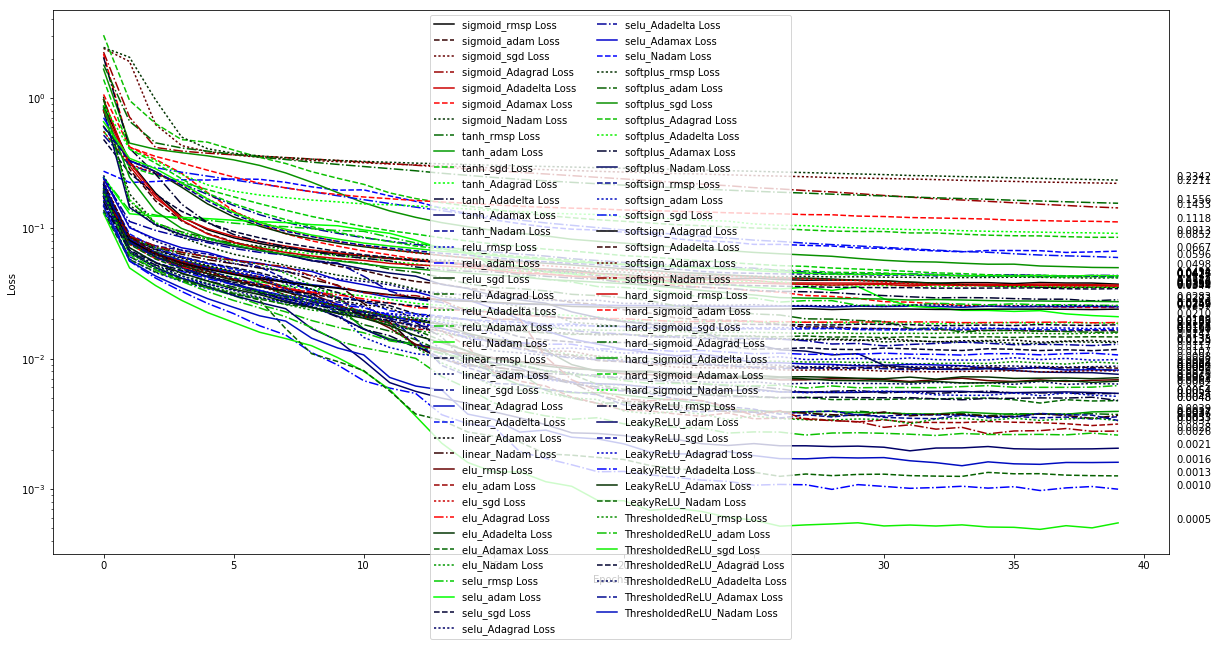

In [19]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

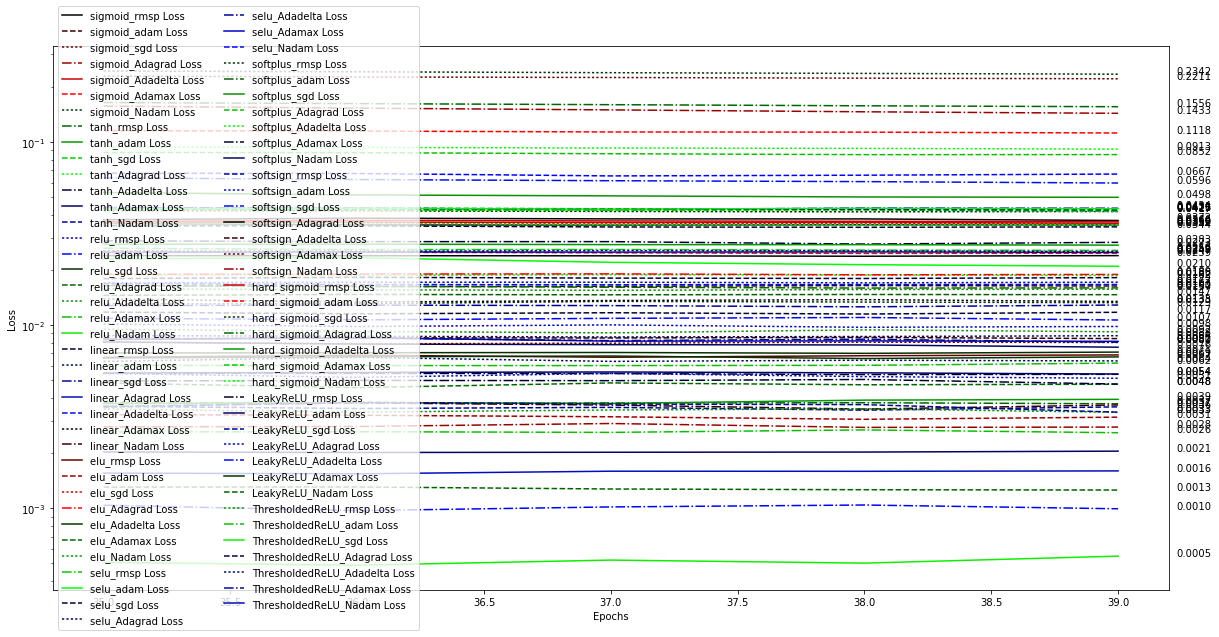

In [20]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [21]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
20,relu_Nadam,0.999927,0.000548,0.99104,0.000484,0.051697,Nadam,relu,26.0,32.0,36.0,2.0
15,relu_adam,0.999820,0.000994,0.99052,0.000549,0.045505,adam,relu,31.0,34.0,36.0,3.0
69,LeakyReLU_Nadam,0.999827,0.001258,0.98824,0.000539,0.055707,Nadam,LeakyReLU,31.0,34.0,33.0,2.0
76,ThresholdedReLU_Nadam,0.999570,0.001600,0.99062,0.000649,0.045880,Nadam,ThresholdedReLU,36.0,36.0,33.0,5.0
64,LeakyReLU_adam,0.999623,0.002051,0.98826,0.000615,0.052258,adam,LeakyReLU,31.0,39.0,31.0,6.0
71,ThresholdedReLU_adam,0.999300,0.002586,0.99072,0.000649,0.041659,adam,ThresholdedReLU,30.0,38.0,32.0,5.0
55,softsign_Nadam,0.999323,0.002776,0.98492,0.000523,0.090759,Nadam,softsign,34.0,39.0,34.0,3.0
29,elu_adam,0.999120,0.003145,0.98646,0.000427,0.069740,adam,elu,38.0,37.0,38.0,2.0
34,elu_Nadam,0.999040,0.003341,0.98494,0.000554,0.082646,Nadam,elu,31.0,33.0,31.0,3.0
49,softsign_rmsp,0.999130,0.003348,0.98614,0.000136,0.065045,rmsp,softsign,32.0,37.0,39.0,4.0


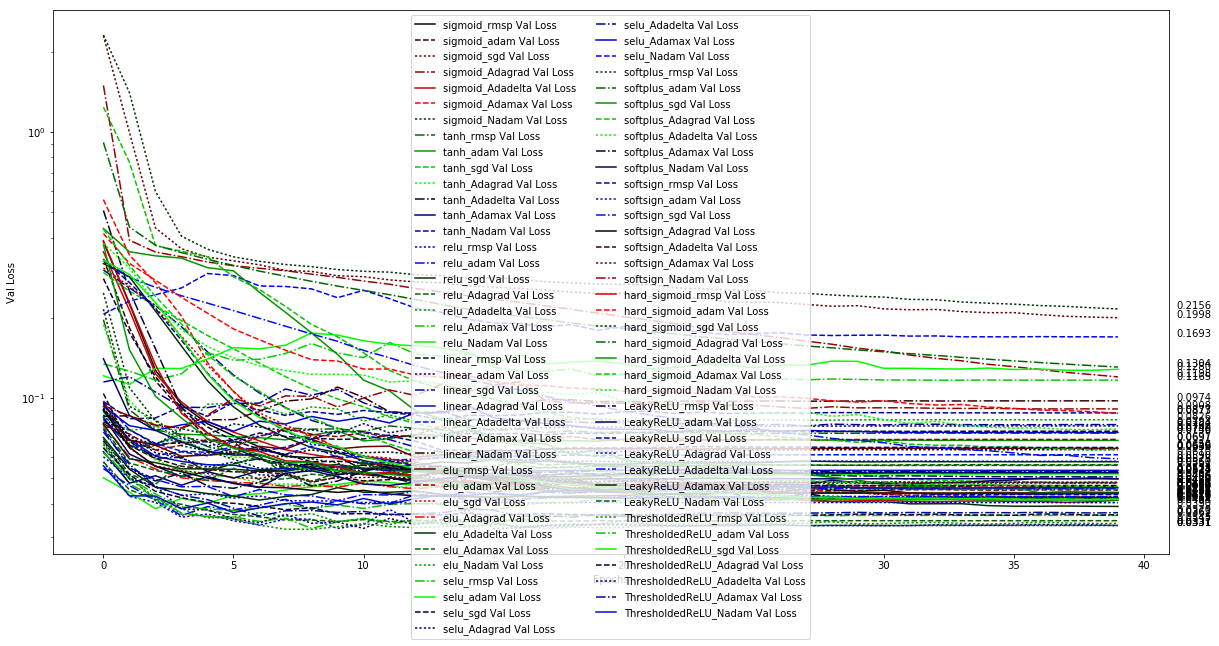

In [22]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

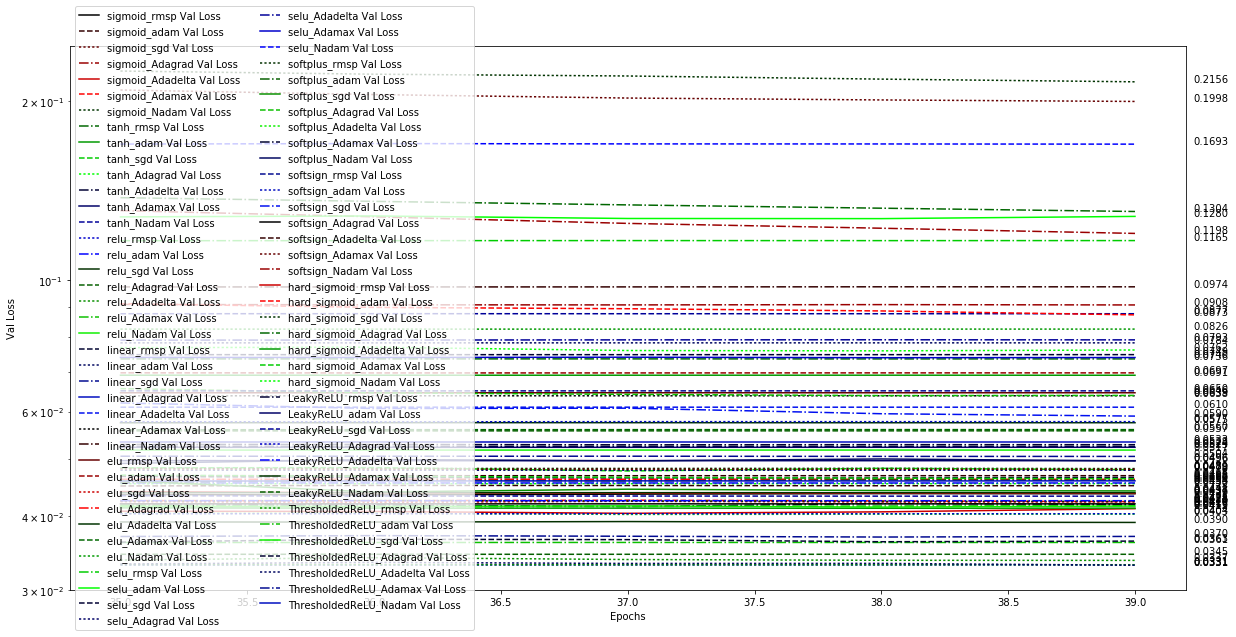

In [23]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [24]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
74,ThresholdedReLU_Adadelta,0.997573,0.008750,0.98998,0.000453,0.033075,Adadelta,ThresholdedReLU,37.0,40.0,32.0,15.0
14,relu_rmsp,0.997187,0.009831,0.99112,0.000376,0.033106,rmsp,relu,27.0,31.0,38.0,9.0
18,relu_Adadelta,0.997577,0.009196,0.99048,0.000431,0.033139,Adadelta,relu,31.0,32.0,37.0,8.0
70,ThresholdedReLU_rmsp,0.995560,0.015707,0.99006,0.000408,0.033702,rmsp,ThresholdedReLU,38.0,35.0,37.0,14.0
17,relu_Adagrad,0.995883,0.014656,0.98922,0.000483,0.034508,Adagrad,relu,30.0,27.0,30.0,11.0
19,relu_Adamax,0.998347,0.006203,0.98980,0.000316,0.036126,Adamax,relu,27.0,32.0,27.0,8.0
73,ThresholdedReLU_Adagrad,0.994683,0.018161,0.98876,0.000796,0.036318,Adagrad,ThresholdedReLU,35.0,38.0,32.0,21.0
75,ThresholdedReLU_Adamax,0.997720,0.008063,0.98938,0.000508,0.036984,Adamax,ThresholdedReLU,31.0,37.0,39.0,18.0
16,relu_sgd,0.989320,0.035193,0.98724,0.000609,0.039045,sgd,relu,36.0,40.0,37.0,39.0
46,softplus_Adadelta,0.989557,0.035236,0.98738,0.000859,0.040314,Adadelta,softplus,37.0,40.0,39.0,37.0


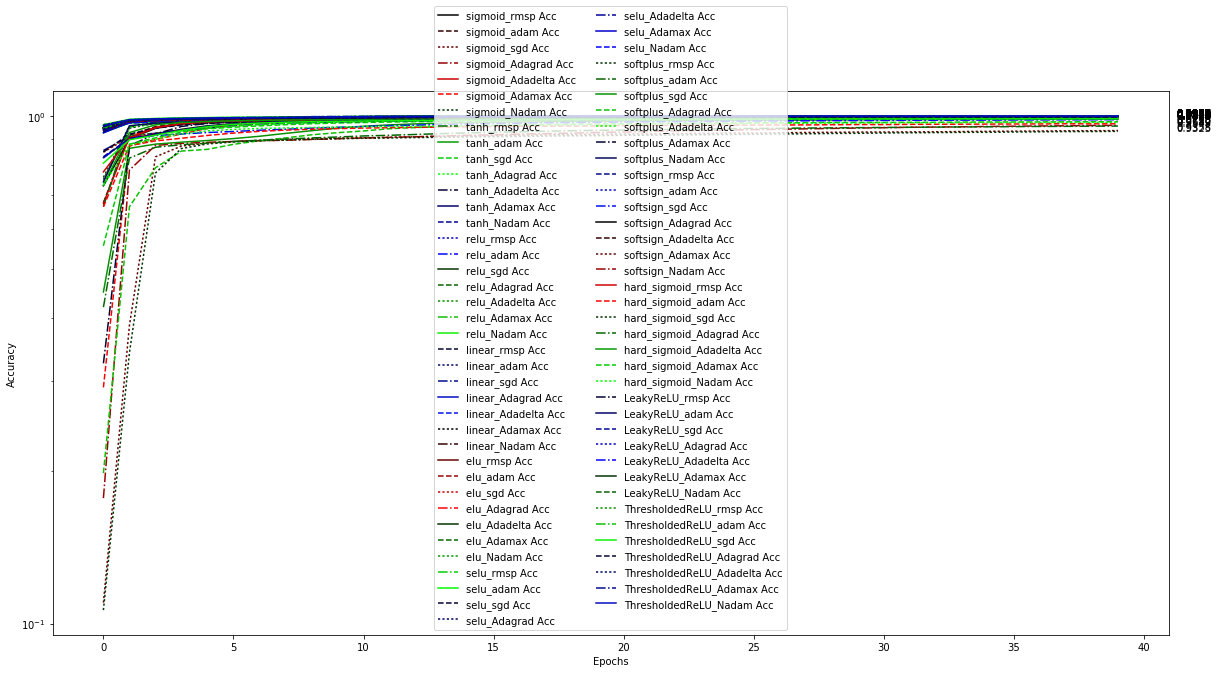

In [25]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

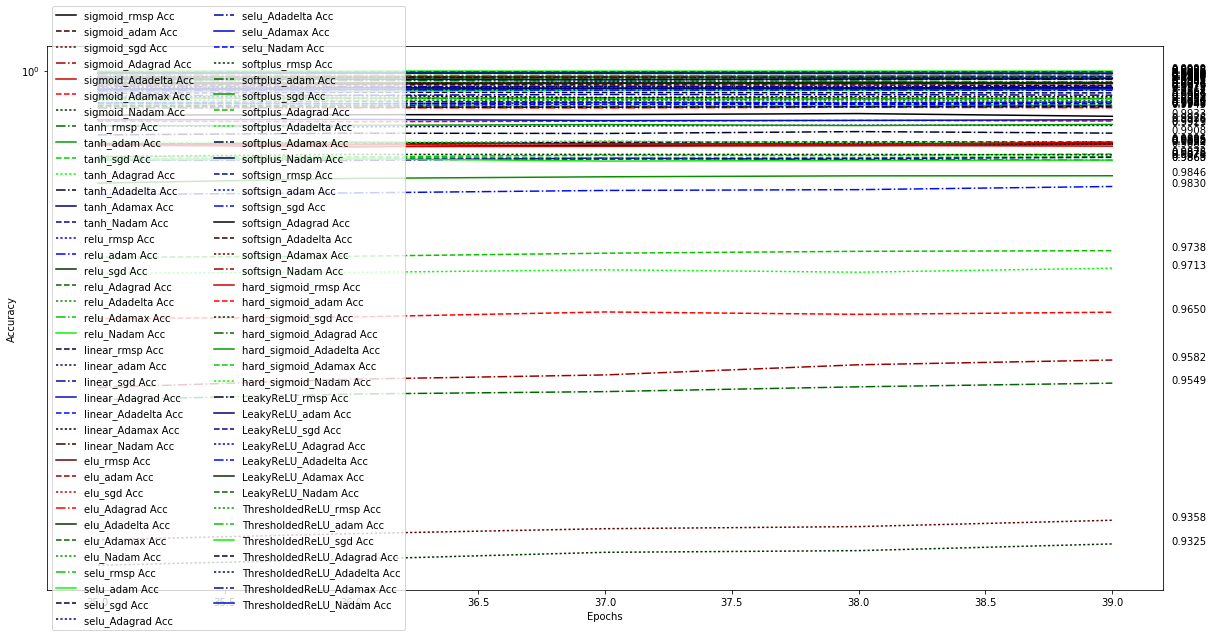

In [26]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [27]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
20,relu_Nadam,0.999927,0.000548,0.99104,0.000484,0.051697,Nadam,relu,26.0,32.0,36.0,2.0
69,LeakyReLU_Nadam,0.999827,0.001258,0.98824,0.000539,0.055707,Nadam,LeakyReLU,31.0,34.0,33.0,2.0
15,relu_adam,0.999820,0.000994,0.99052,0.000549,0.045505,adam,relu,31.0,34.0,36.0,3.0
64,LeakyReLU_adam,0.999623,0.002051,0.98826,0.000615,0.052258,adam,LeakyReLU,31.0,39.0,31.0,6.0
76,ThresholdedReLU_Nadam,0.999570,0.001600,0.99062,0.000649,0.045880,Nadam,ThresholdedReLU,36.0,36.0,33.0,5.0
55,softsign_Nadam,0.999323,0.002776,0.98492,0.000523,0.090759,Nadam,softsign,34.0,39.0,34.0,3.0
71,ThresholdedReLU_adam,0.999300,0.002586,0.99072,0.000649,0.041659,adam,ThresholdedReLU,30.0,38.0,32.0,5.0
49,softsign_rmsp,0.999130,0.003348,0.98614,0.000136,0.065045,rmsp,softsign,32.0,37.0,39.0,4.0
29,elu_adam,0.999120,0.003145,0.98646,0.000427,0.069740,adam,elu,38.0,37.0,38.0,2.0
34,elu_Nadam,0.999040,0.003341,0.98494,0.000554,0.082646,Nadam,elu,31.0,33.0,31.0,3.0


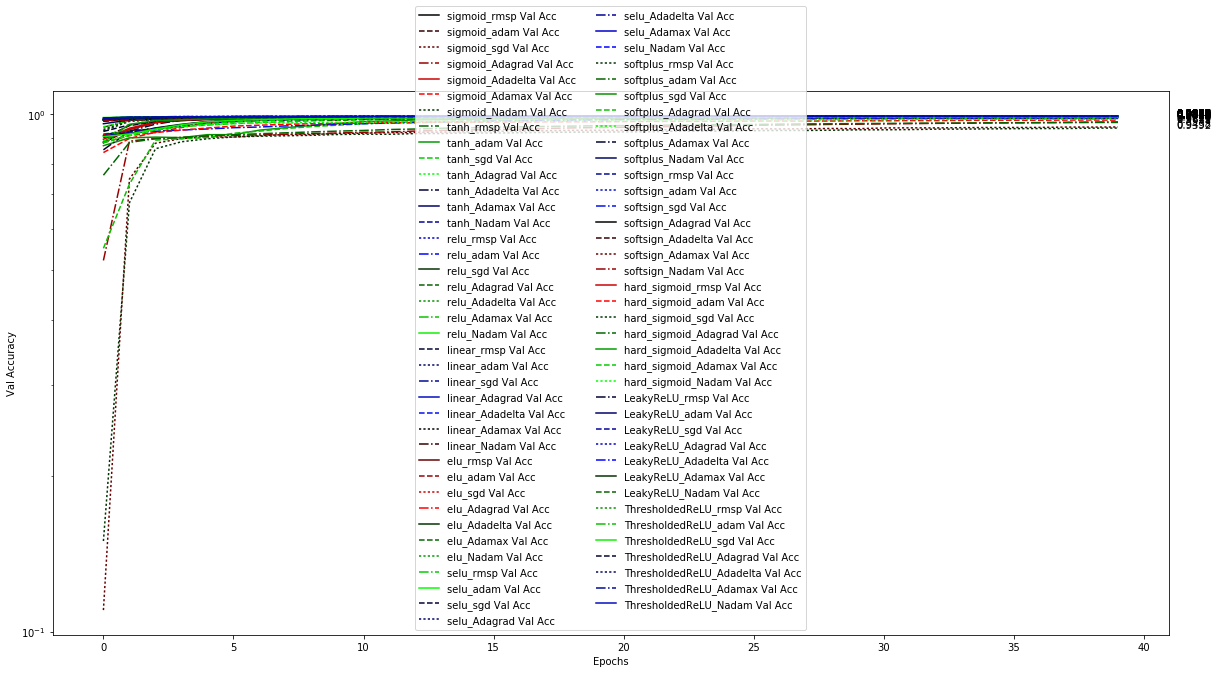

In [28]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

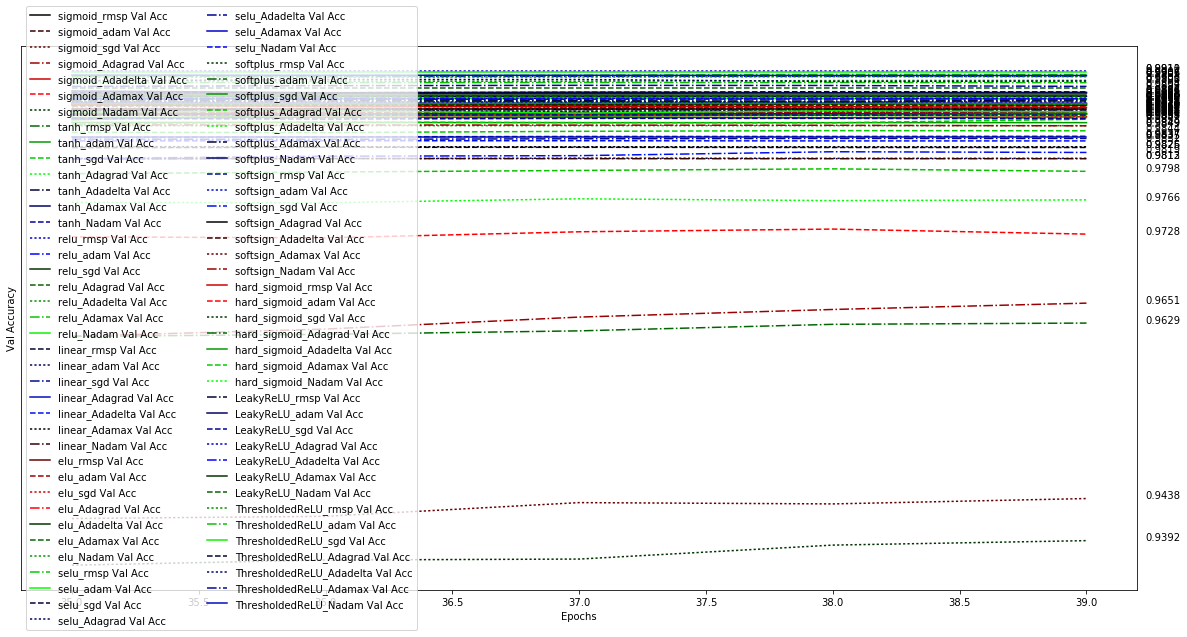

In [29]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [30]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
14,relu_rmsp,0.997187,0.009831,0.99112,0.000376,0.033106,rmsp,relu,27.0,31.0,38.0,9.0
20,relu_Nadam,0.999927,0.000548,0.99104,0.000484,0.051697,Nadam,relu,26.0,32.0,36.0,2.0
71,ThresholdedReLU_adam,0.999300,0.002586,0.99072,0.000649,0.041659,adam,ThresholdedReLU,30.0,38.0,32.0,5.0
76,ThresholdedReLU_Nadam,0.999570,0.001600,0.99062,0.000649,0.045880,Nadam,ThresholdedReLU,36.0,36.0,33.0,5.0
15,relu_adam,0.999820,0.000994,0.99052,0.000549,0.045505,adam,relu,31.0,34.0,36.0,3.0
18,relu_Adadelta,0.997577,0.009196,0.99048,0.000431,0.033139,Adadelta,relu,31.0,32.0,37.0,8.0
70,ThresholdedReLU_rmsp,0.995560,0.015707,0.99006,0.000408,0.033702,rmsp,ThresholdedReLU,38.0,35.0,37.0,14.0
74,ThresholdedReLU_Adadelta,0.997573,0.008750,0.98998,0.000453,0.033075,Adadelta,ThresholdedReLU,37.0,40.0,32.0,15.0
19,relu_Adamax,0.998347,0.006203,0.98980,0.000316,0.036126,Adamax,relu,27.0,32.0,27.0,8.0
75,ThresholdedReLU_Adamax,0.997720,0.008063,0.98938,0.000508,0.036984,Adamax,ThresholdedReLU,31.0,37.0,39.0,18.0


In [31]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
                   config       acc      loss  val_acc  val_acc_std  val_loss  \
20             relu_Nadam  0.999927  0.000548  0.99104     0.000484  0.051697   
69        LeakyReLU_Nadam  0.999827  0.001258  0.98824     0.000539  0.055707   
15              relu_adam  0.999820  0.000994  0.99052     0.000549  0.045505   
64         LeakyReLU_adam  0.999623  0.002051  0.98826     0.000615  0.052258   
76  ThresholdedReLU_Nadam  0.999570  0.001600  0.99062     0.000649  0.045880   

      opt              act  max_acc_epoch  max_val_acc_epoch  min_loss_epoch  \
20  Nadam             relu           26.0               32.0            36.0   
69  Nadam        LeakyReLU           31.0               34.0            33.0   
15   adam             relu           31.0               34.0            36.0   
64   adam        LeakyReLU           31.0               39.0            31.0   
76  Nadam  ThresholdedReLU           36.0               36.0            33.0   

    min_va

In [35]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.3
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [33]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

,index,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch,acc_score,val_acc_score,loss_score,val_loss_score,val_acc_epoch_score,total_score,total_score_norm
0,17,relu_Adagrad,0.995883,0.014656,0.98922,0.000483,0.034508,Adagrad,relu,30.0,27.0,30.0,11.0,0.940028,0.963391,0.939624,0.992155,0.928571,2.004370,1.000000
1,67,LeakyReLU_Adadelta,0.997097,0.010662,0.98794,0.000589,0.042480,Adadelta,LeakyReLU,36.0,27.0,33.0,9.0,0.958024,0.938728,0.956717,0.948490,0.928571,1.981682,0.988681
2,68,LeakyReLU_Adamax,0.998187,0.007124,0.98846,0.000467,0.043824,Adamax,LeakyReLU,32.0,28.0,32.0,6.0,0.974192,0.948748,0.971859,0.941128,0.857143,1.978398,0.987042
3,14,relu_rmsp,0.997187,0.009831,0.99112,0.000376,0.033106,rmsp,relu,27.0,31.0,38.0,9.0,0.959359,1.000000,0.960276,0.999835,0.642857,1.968531,0.982120
4,20,relu_Nadam,0.999927,0.000548,0.99104,0.000484,0.051697,Nadam,relu,26.0,32.0,36.0,2.0,1.000000,0.998459,1.000000,0.898003,0.571429,1.949488,0.972619
5,18,relu_Adadelta,0.997577,0.009196,0.99048,0.000431,0.033139,Adadelta,relu,31.0,32.0,37.0,8.0,0.965144,0.987669,0.962993,0.999651,0.571429,1.937899,0.966837
6,12,tanh_Adamax,0.998830,0.005408,0.98748,0.000736,0.049607,Adamax,tanh,39.0,29.0,39.0,18.0,0.983734,0.929865,0.979201,0.909448,0.785714,1.937256,0.966516
7,19,relu_Adamax,0.998347,0.006203,0.98980,0.000316,0.036126,Adamax,relu,27.0,32.0,27.0,8.0,0.976565,0.974566,0.975802,0.983289,0.571429,1.928515,0.962156
8,66,LeakyReLU_Adagrad,0.995357,0.017153,0.98762,0.000466,0.040384,Adagrad,LeakyReLU,39.0,29.0,31.0,12.0,0.932216,0.932563,0.928939,0.959966,0.785714,1.919272,0.957544
9,15,relu_adam,0.999820,0.000994,0.99052,0.000549,0.045505,adam,relu,31.0,34.0,36.0,3.0,0.998418,0.988439,0.998091,0.931918,0.428571,1.902412,0.949132


In [34]:
sorted_by_score.to_csv('./results.csv')

In [60]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
